# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла Preprocessing basics.ipynb (и не только).


#### Вопросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Медиана какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего unskilled работников мужского рода?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе? Как они обозначены <br>
7. Попытайтесь заполнить пропущенные значения минимум двумя способами.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?<br>
12. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

**German Credit data** <br>
This dataset classifies people described by a set of attributes as good or bad credit risks ('class' attribute). <br>
1. checking_status -  Status of existing checking account, in Deutsche Mark.
2. duration - Duration in months
3. credit_history - Credit history (credits taken, paid back duly, delays, critical accounts)
4. purpose - Purpose of the credit (car, television,…)
5. credit_amount - Credit amount
6. savings_status - Status of savings account/bonds, in Deutsche Mark.
7. employment - Present employment, in number of years.
8. installment_commitment - Installment rate in percentage of disposable income
9. personal_status - Personal status (married, single,…) and sex
10. other_parties - Other debtors / guarantors
11. property_magnitude - Property (e.g. real estate)
12. age - Age in years
13. other_payment_plans - Other installment plans (banks, stores)
14. housing - Housing (rent, own,…)
15. existing_credits - Number of existing credits at this bank
16. job - Job
17. num_dependents - Number of people being liable to provide maintenance for
18. own_telephone - Telephone (yes,no)
19. foreign_worker - Foreign worker (yes,no)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from astropy.wcs.docstrings import kind
from dask.utils import methodcaller

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530903_80101.csv'
credit_df = pd.read_csv(path, index_col=0)

### 1. В какой шкале представлены все признаки в наборе?<br>

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   purpose             501 non-null    object 
 4   credit_amount       501 non-null    float64
 5   savings_status      501 non-null    object 
 6   employment          501 non-null    object 
 7   personal_status     501 non-null    object 
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             474 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  foreign_worker      501 non-null    object 
 15  class               501 non-null    object 
dtypes: float

| Признак            |            Шкала             | Пояснение                                                                                                                                                                                                                                             |
|--------------------|:----------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| checking_status    | Интервальная или номинальная | Можно сказать, что указанные интервалы выстраиваются в последовательность, а "no checking" - пропуск значения. Но тогда пропусков будет половина базы                                                                                                 |
| duration           |          Абсолютная          | Срок действия может быть любой и имеет смысл деление одного срока на другой, к примеру, для вычисления пропорции                                                                                                                                      |
| credit_history     |  Номинальная или порядковая  | В базе явно видны категории истории клиентов - критическая/есть другой кредит, нет кредитов/все выплачены. Гипотетически можно построить иерархию надежности клиентов по истории                                                                      |
| purpose            |  Номинальная или порядковая  | В базе явно видны категории целей - образование, машина, радио/тв. Гипотетически можно построить иерархию по стоимости целей                                                                                                                          |
| credit_amount      |          Абсолютная          | Данные представлены натуральным числом и имеет смысл вычислять пропорции между суммами кредитов                                                                                                                                                       |
| savings_status     |         Интервальная         | Можно построить последовательность промежутков данных о сбережениях, где у кого-то больше отложений, у кого-то меньше, у кого-то вообще нет                                                                                                           |
| employment         |         Интервальная         | Можно построить послеовательность промежутков с опытом работы, где понятно, что кто-то работал на столько-то лет больше другого                                                                                                                       |
| personal_status    |         Номинальная          | В базе ясно видны категории клиентов. Выстраивать их в иерархию и как-то складывать вычитать бессмысленно                                                                                                                                             |
| property_magnitude |  Номинальная или порядковая  | В базе ясно видны категории собственности. Гипотетически можно выстроить иерархию по стоимости собственности                                                                                                                                          |
| age                |         Интервальная         | Можно сравнить, построить иерархию от старости к молодости и между данными четко видно, сколько единиц разницы                                                                                                                                        |
| housing            |  Номинальная или порядковая  | В базе ясно видны категории собственности. Гипотетически можно выстроить иерархию по стоимости собственности                                                                                                                                          |
| existing_credits   |          Порядковая          | Легко выстраивается иерархия "2 кредита > 1 кредит", но анализировать разницу между числом кредитов смысла нет, т.к. не указан их размер - как оценить разницу между одним кредитом на 100 у.е. и тремя на 10 у.е. - не ясно. Поэтому не интервальная |
| job                |         Номинальная          | Описаны категории работ. Однако иерархию построить не получится, потому что самозанятый может зарабатывать как меньше квалифицированного работника так и больше.                                                                                      |
| num_dependents     |          Порядковая          | Легко выстраивается иерархия "2 платящих > 1 платящего", но один человек может зарабатывать больше, чем десять других вместе взятых, поэтому рассматривать разницу между количеством платящих бессмысленно, поэтому не интервальная                   |
| own_telephone      |         Номинальная          | Бинарный признак                                                                                                                                                                                                                                      |
| foreign_worker     |         Номинальная          | Бинарный признак                                                                                                                                                                                                                                      |


### 2. Укажите признак с наименьшей дисперсией.
#### Ответ: num_dependents

In [5]:
credit_df.var()

C:\Users\vanoy\AppData\Local\Temp/ipykernel_54936/1403863766.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_df.var()


duration            1.465e+02
credit_amount       2.657e+07
age                 1.378e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64

### 3. Медиана какого признака отличается для двух классов сильнее всего?

#### Ответ: duration

In [6]:
#Как понял: есть два класса - good и bad. Отбираем их отдельно. Смотрим медиану у этих подмножеств. У какого признака больше разница между этими двумя медианами?
good_df = credit_df[credit_df['class'] == 'good']
bad_df = credit_df[credit_df['class'] == 'bad']

median_diff = good_df.median() / bad_df.median() # Если медианы одинаковые будет 1. Чем больше разница тем больше отклонение от 1
abs(median_diff - 1 / median_diff) # Но имеет значение что на что поделено. К примеру, 3 / 1 отличается от 1 на 2, а 1 / 3 отличается от 1 на 0.67
# По идее можно было просто разницу посчитать, но пропорция возволяет не нормализовывать признаки, чтобы адекватно их сравнивать

C:\Users\vanoy\AppData\Local\Temp/ipykernel_54936/4189611449.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_diff = good_df.median() / bad_df.median() # Если медианы одинаковые будет 1. Чем больше разница тем больше отклонение от 1


duration            0.975
credit_amount       0.534
age                 0.185
existing_credits    0.000
num_dependents      0.000
dtype: float64

### 4. В каком классе больше всего unskilled работников мужского рода?
#### Ответ: в классе "good"

In [7]:
good_unskilled_male = (good_df['job'].str.contains('unskilled') &
                       (good_df['personal_status'].str.contains('female') == False)).sum()
bad_unskilled_male = (bad_df['job'].str.contains('unskilled') &
                       (bad_df['personal_status'].str.contains('female') == False)).sum()
(good_unskilled_male, bad_unskilled_male)

(57, 16)

### 5. Есть ли в наборе признаки с выбросами? Какие?

#### Ответ: Есть выбросы у: duration, credit_amount, age
#### У existing_credits и num_dependencies нет выбросов, т.к. это порядковые шкалы - там узкое количество значений.

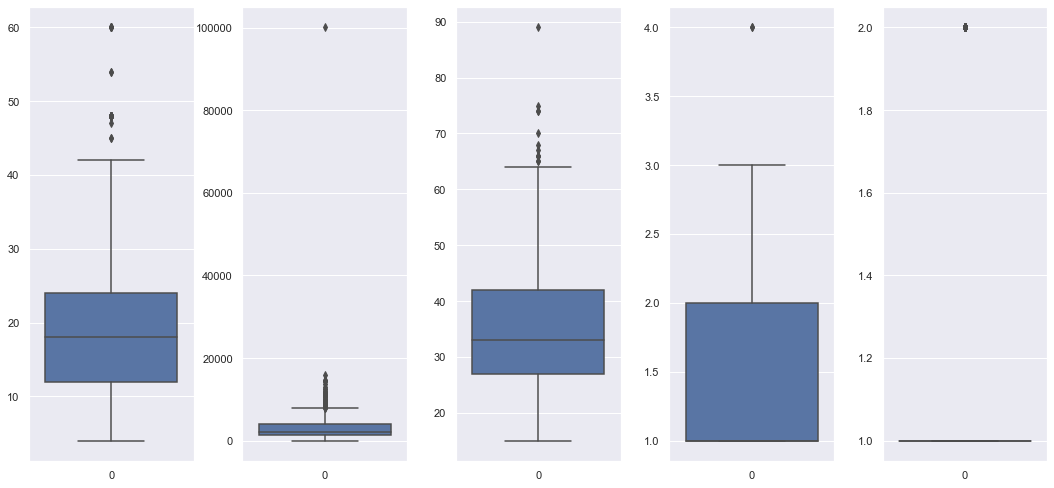

In [8]:
numeric_columns = credit_df.describe().columns
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(15,7))
fig.tight_layout()
for column, ax in zip(numeric_columns, axs):
    sns.boxplot(ax=ax, data=credit_df[column])

### 6. Сколько пропущенных значений в наборе? Как они обозначены

#### Ответ: Housing - 27 пропущенных записей, обозначены NaN

In [9]:
(credit_df['housing'].isnull()).sum()

27

<AxesSubplot:>

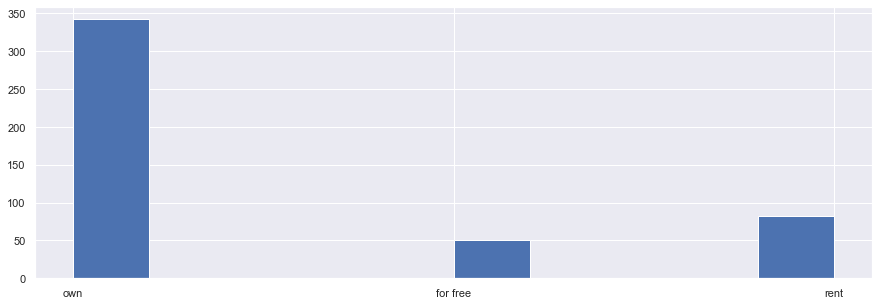

In [10]:
pd.Series(credit_df['housing']).hist(figsize=(15, 5))

In [11]:
pd.Series(credit_df['housing']).unique()

array(['own', 'for free', 'rent', nan], dtype=object)

### 7. Попытайтесь заполнить пропущенные значения минимум двумя способами.

In [12]:
pd.Series(credit_df['housing'].replace(np.NaN, 'no known housing')).unique()

array(['own', 'for free', 'rent', 'no known housing'], dtype=object)

In [13]:
pd.Series(credit_df['housing'].fillna('no known housing')).unique()

array(['own', 'for free', 'rent', 'no known housing'], dtype=object)

### 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

<AxesSubplot:>

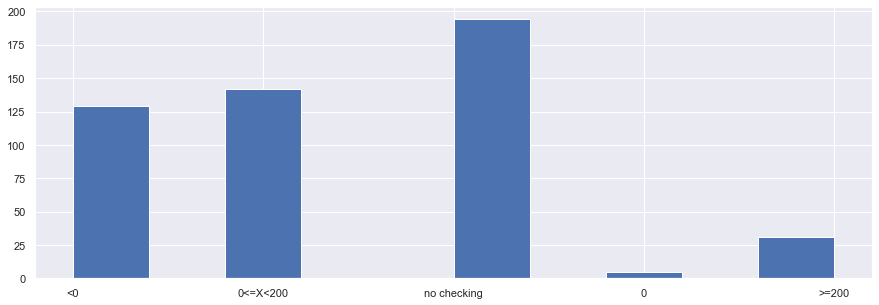

In [14]:
pd.Series(credit_df['checking_status']).hist(figsize=(15, 5))

<AxesSubplot:ylabel='credit_history'>

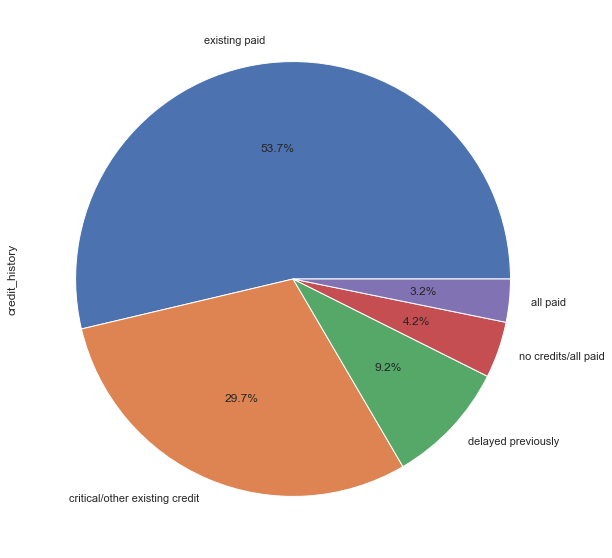

In [15]:
credit_df['credit_history'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))

<AxesSubplot:ylabel='savings_status'>

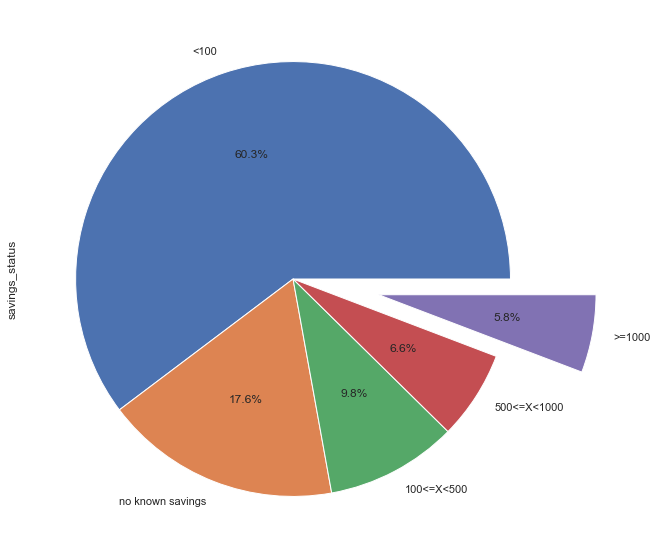

In [16]:
saving_counts = credit_df['savings_status'].value_counts()
interesting_part = (credit_df['savings_status'] == '>=1000').sum()
saving_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), explode=(saving_counts==interesting_part) * 0.4)

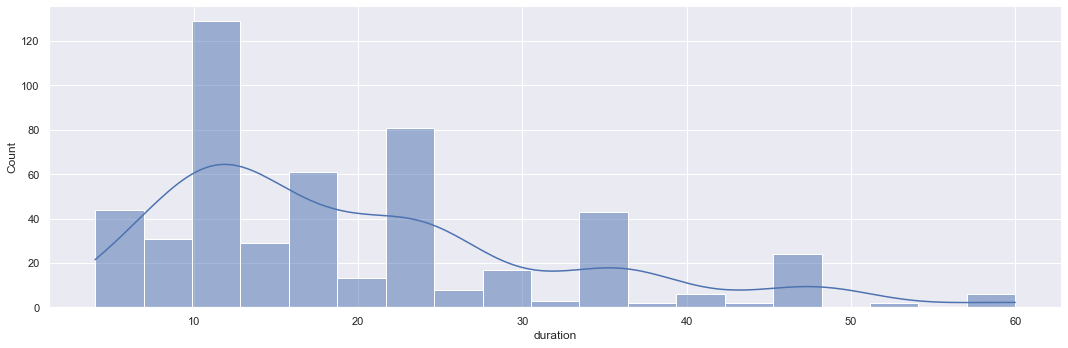

In [17]:
sns.displot(credit_df['duration'], kde=True, aspect=3, height=5)

### 9. Проанализируйте взаимосвязи признаков с помощью scatter plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?
#### Ответ: что чем больше кредит берется, тем дольше он выплачивается - между Duration и Credit_amount есть средней силы положительная корреляция

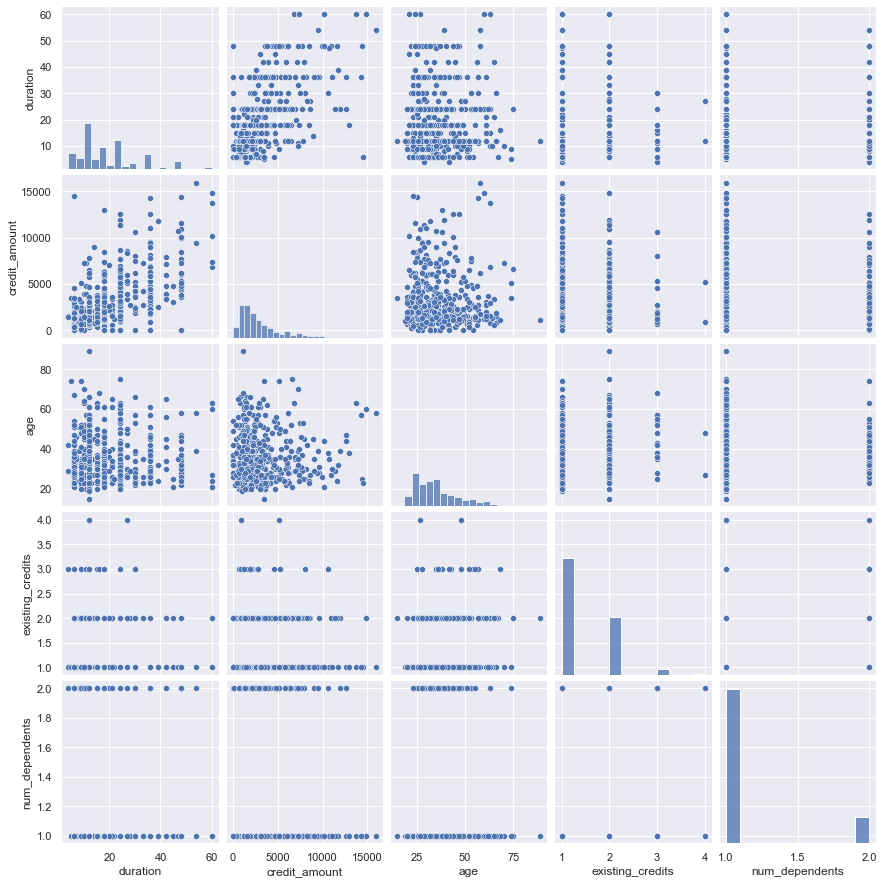

In [18]:
sns.pairplot(data=credit_df[numeric_columns][credit_df[numeric_columns] <= 20000])

(0.0, 20000.0)

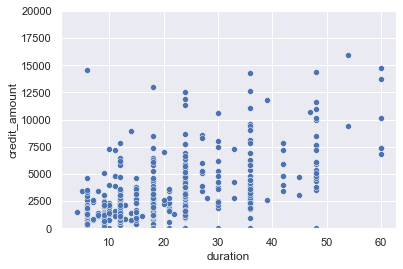

In [19]:
sns.scatterplot(data=credit_df, x='duration', y='credit_amount')
plt.ylim(0,20000)

<AxesSubplot:>

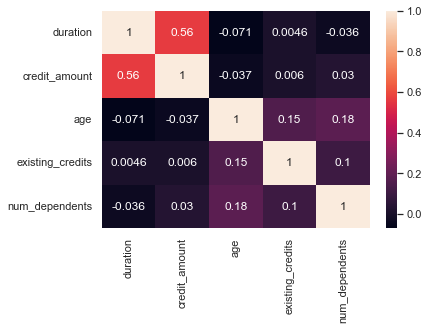

In [21]:
corr_matrix = credit_df[numeric_columns].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

### 10. Какой признак(и) имеет смысл стандартизировать? Почему?

Credit_amount - т.к. он имеет один выброс в 100 тысяч, который очень мешает исследовать его scatter plot-ом

### 11. Какой признак(и) (если такой(ие) есть) кажется вам проблематичным? Что бы вы предложили с ним сделать?

Число плательщиков - не вижу смысла, зачем знать, сколько людей платят кредит, если неизвестны их доходы. На мой взгляд - этот признак можно убрать, либо добавить информацию о суммарном заработке.
Число кредитов - не вижу смысла, зачем знать, сколько кредитов висит на человеке, если неизвестен их размер. На мой взгляд - этот признак можно либо убрать, либо добавить информацию о суммарном займе

### 12. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

Доход за год / месяц - зная доход человека можно предполагать размер кредита, который он сможет выплатить
Суммарная задолженность - есть информация про число взятых в банке кредитов, но нет информации о сумме кредитов - эта информация позволит оценить, сколько еще денег можно занять человеку в зависимости от его заработка